# Multiple Linear Regression

In Simple Linear Regression, we have built a model with one response(y) and one feature (X) variable.
By using **Multiple Linear Regression**, we can build relationship between one dependent and several independent varible 

## Importing and Understanding data

In [1]:
#import data using Pandas

import pandas as pd

advertising = pd.read_csv("advertising.csv")

In [2]:
#First 5 rows
advertising.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [3]:
#Last 5 rows
advertising.tail()

,TV,Radio,Newspaper,Sales
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5
199,232.1,8.6,8.7,13.4


In [4]:
#check column info of dataframe
advertising.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
TV           200 non-null float64
Radio        200 non-null float64
Newspaper    200 non-null float64
Sales        200 non-null float64
dtypes: float64(4)
memory usage: 6.3 KB


In [5]:
#Check shape of dataframe
advertising.shape

(200, 4)

In [6]:
# Check some statistical information about dataframe
advertising.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


## Visualising Data using Seaborn

In [7]:
import seaborn as sns

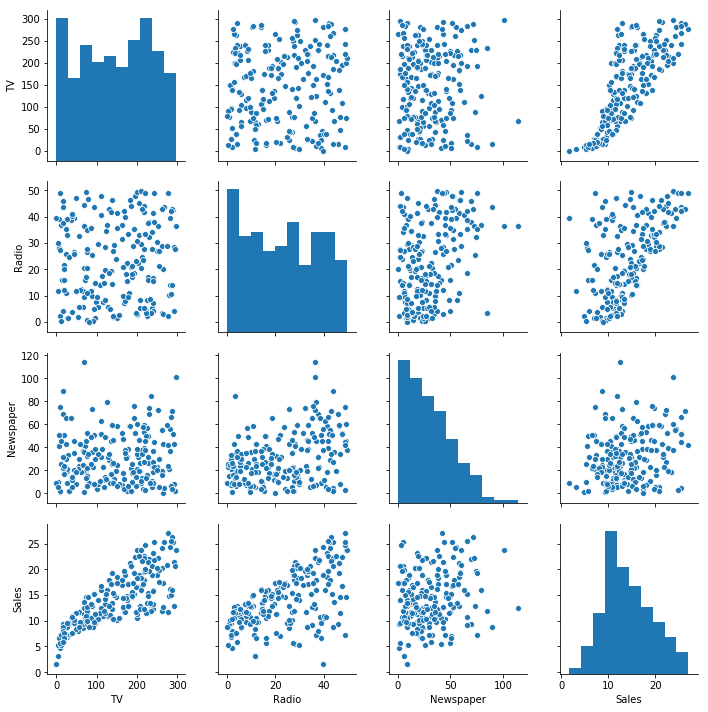

In [8]:
#plot pairs of all variables in dataframe

sns.pairplot(advertising)


 By looking at all plots, there is no correlation between TV, Radio and Newspaper.
So only plots in last row are useful

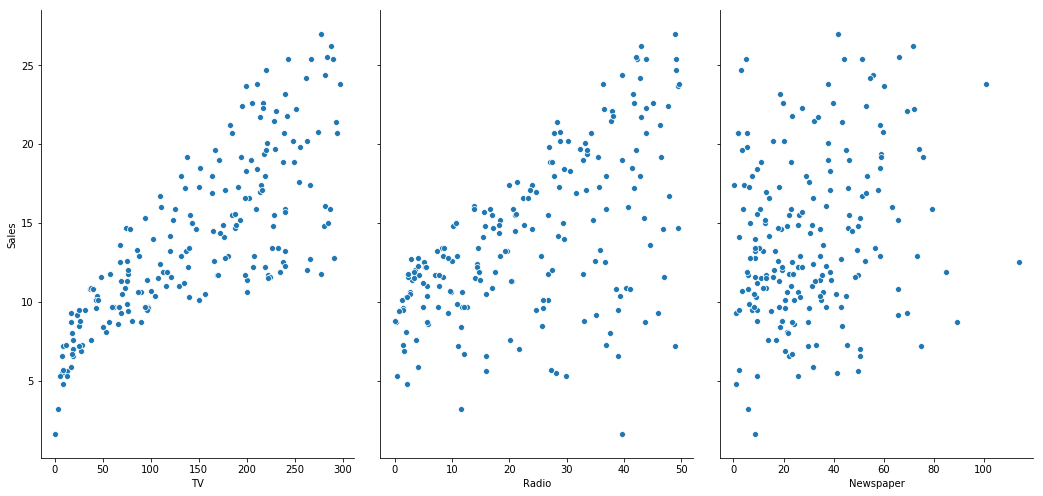

In [9]:
# Plotting only last row plots
sns.pairplot(advertising, x_vars=["TV", "Radio", "Newspaper"], y_vars=["Sales"], height=7, aspect=0.7, kind="scatter")


Newspaper does not seem to have any relation with sales but Radio and TV seems to have

## Splitting data into test and training sets

In [10]:
#put feature varibles into X
X = advertising[["TV", "Radio", "Newspaper"]]

X.head()

,TV,Radio,Newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4


In [11]:
# put response varibales into y
y= advertising[['Sales']]
y.head()

,Sales
0,22.1
1,10.4
2,9.3
3,18.5
4,12.9


In [12]:
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100)

### Perform Linear Regression

In [13]:
from sklearn.linear_model import LinearRegression

# we used same LinearRegression class as it is capable of handling both simple and multiple linear regressions
mlr = LinearRegression()

mlr.fit(X_train, y_train)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

   ### Coefficients Calculation

In [14]:
print("Multiple L.R. Intercept::", mlr.intercept_)

Multiple L.R. Intercept:: [2.65278967]


In [15]:
#Coefficients
mlr.coef_

array([[0.0454256 , 0.18975773, 0.00460308]])

In [16]:
# as coefficients are stored in array, we need to map them as per X values
coeff_df = pd.DataFrame(mlr.coef_, columns=X_test.columns)
coeff_df


,TV,Radio,Newspaper
0,0.045426,0.189758,0.004603


- From above result, If TV budget increates by 1 unit, sales increases by 0.045 units.
- Value for radio is quite high, so this signifies that increasing budget in radio marketing, will increase sales

### Predictions

In [17]:
y_pred = mlr.predict(X_test)

### Caclulating Error terms

In [18]:
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test, y_pred)
r_square = r2_score(y_test, y_pred)

print("Mean Squared Error::", mse)
print("r_square_value::", r_square)

Mean Squared Error:: 1.8506819941636956
r_square_value:: 0.9058622107532246


Mean Squared Error is 1.85. It means model is not able to match 1.85 % values only.

### Checking P-Value using STATSMODELS

In [19]:
import statsmodels.api as sm

X_train_sm = X_train

# unlike sklearn, statsmodels dont automatically fit a constant.
# So, need to add constant manually using sm.add_constant(X)

X_train_sm = sm.add_constant(X_train_sm)

# Ordinary Least Squared Model
lm_l = sm.OLS(y_train, X_train_sm).fit()

lm_l.params

C:\Apps\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


const        2.652790
TV           0.045426
Radio        0.189758
Newspaper    0.004603
dtype: float64

In [20]:
lm_l.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.893
Model:                            OLS   Adj. R-squared:                  0.890
Method:                 Least Squares   F-statistic:                     377.6
Date:                Thu, 04 Jul 2019   Prob (F-statistic):           9.97e-66
Time:                        22:45:41   Log-Likelihood:                -280.83
No. Observations:                 140   AIC:                             569.7
Df Residuals:                     136   BIC:                             581.4
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.6528      0.384      6.906      0.000       1.893       3.412
TV             0.0454      0.002     27.093      0.000       0.042       0.049
Radio          0.1898      0.011     17.009      0.000       0.168       0.212
Newspaper      0.0046      0.008      0.613      0.541      -0.010       0.019
==============================================================================
Omnibus:                       40.095   Durbin-Watson:                   1.862
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               83.622
Skew:                          -1.233   Prob(JB):                     6.94e-19
Kurtosis:                       5.873   Cond. No.                         443.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## From summary, check table for constant, TV, Radio, Newspaper.
- **std err** : is difference between actual and predicted value
- **t** : is ratio of estimated coefficient and standard error. i.e. coeff / std err
- **P >|t|** : This P value is used for Hypothesis Testing. We will go for **Null Hypothesis** here to decide which variable 
is not significant.
For **Alternate Hypothesis**, we decide which variable is significant.
For **Null Hypothesis, P-value > 0.05**

As P-Value for Newspaper is quite high (0.541), it is not significant. So we will consider model with TV and Radio only.

### Draw heatmap for advertising correlations

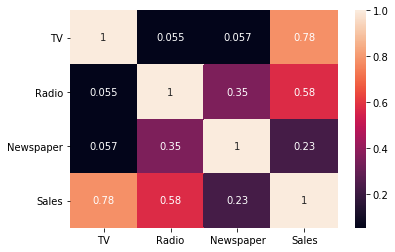

In [24]:
import matplotlib.pyplot as plt

sns.heatmap(advertising.corr(), annot=True)

Correlation is quite high for TV and Radio.

## Building model again with TV and Radio only

In [26]:
X_train_2 = X_train[['TV', 'Radio']]
X_test_2 = X_test[['TV', 'Radio']]

In [27]:
mlr.fit(X_train_2, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [30]:
y_pred_2 = mlr.predict(X_test_2)

## Plotting Test vs Predicted values for Sales

Text(0.5, 1.0, 'Actual vs Predicted')

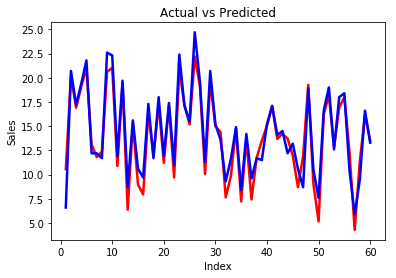

In [37]:
c =[i for i in range(1, 61, 1)]      #  Generate index for x-axis

fit = plt.figure()
plt.plot(c, y_pred_2, color="red", linewidth=2.5)
plt.plot(c, y_test, color="blue", linewidth=2.5)

plt.xlabel("Index")
plt.ylabel("Sales")
plt.title("Actual vs Predicted")


Text(0.5, 1.0, 'Error Terms')

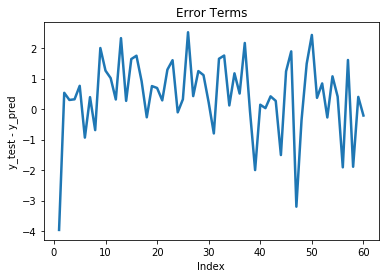

In [39]:
# Error Termns

c =[i for i in range(1, 61, 1)]      #  Generate index for x-axis

fit = plt.figure()
plt.plot(c, y_test - y_pred_2,  linewidth=2.5)


plt.xlabel("Index")
plt.ylabel("y_test - y_pred")
plt.title("Error Terms")

# this plot is centered around 0 value. and plots difference between actual and predicted y value.
# if point is near to 0, prediction is almost equal. For spikes, significant difference between actual and predicted value.

### Calculating Error Terms

In [40]:
mse2 = mean_squared_error(y_test, y_pred_2)
r_square_2 = r2_score(y_test, y_pred_2)

print("Mean Squared Error::", mse2)
print("r_square_value::", r_square_2)


Mean Squared Error:: 1.78474005209028
r_square_value:: 0.909216449171822


### Printing summary for new Model

In [44]:
X_train_sm_2 = X_train_2
X_train_sm_2 = sm.add_constant(X_train_sm_2)

lm_2 = sm.OLS(y_train, X_train_sm_2).fit()

lm_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.893
Model:                            OLS   Adj. R-squared:                  0.891
Method:                 Least Squares   F-statistic:                     568.8
Date:                Thu, 04 Jul 2019   Prob (F-statistic):           4.46e-67
Time:                        23:15:41   Log-Likelihood:                -281.03
No. Observations:                 140   AIC:                             568.1
Df Residuals:                     137   BIC:                             576.9
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.7190      0.368      7.392      0.000       1.992       3.446
TV             0.0455      0.002     27.368      0.000       0.042       0.049
Radio          0.1925      0.010     18.860      0.000       0.172       0.213
==============================================================================
Omnibus:                       41.530   Durbin-Watson:                   1.862
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               90.544
Skew:                          -1.255   Prob(JB):                     2.18e-20
Kurtosis:                       6.037   Cond. No.                         419.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Equation of line formed using coefficients is

y = 2.72 + 0.0455 * TV + 0.1925 * Radio